## Get the information from web pages -- HTML and Beautifulsoup

In the last part of today's class, we are going to learn how to access a particular part of the webpage. Up till now, what we scrape is simply text files (robots.txt) for different websites. In pratice, most webpages online are displayed through **HTML** file. For example, this page from Craigslit is displayed through HTML file. 


**Hyper Text Markup Language (HTML)** is the standard markup language for creating Web pages:

1. HTML describes the structure of Web pages using markup.
2. HTML elements are the building blocks of HTML pages
3. HTML elements are represented by tags
4. HTML tags label pieces of content such as "heading", "paragraph", "table", and so on
5. Browsers do not display the HTML tags, but use them to render the content of the page

### Example: An HTML page
The following website shows a simple HTML Page: [A Simple HTML Page](https://www.w3schools.com/html/tryit.asp?filename=tryhtml_intro). HTML tags are element names surrounded by angle brackets. For example: **< tagname>content goes here...</ tagname>**. 

1. HTML tags normally come in pairs. 
2. The first tag in a pair is the start tag, the second tag is the end tag
3. The end tag is written like the start tag, but with a forward slash inserted before the tag name
4. HTML elements have attributes. For example, the element defined by **< html lang="en-US">element< html>** has attributes "lang" equal to "en-US". ***Attributes are very important since it can be used to locate information on HTML pages***
5. HTML tags can be nested.
6. There are also tags for purely formatting purposes. For example, < b> is a tag for Bold text. 


The key tags/elements in the above example are:
    
    * The <!DOCTYPE html> declaration defines this document to be HTML5. All HTML documents must start with a document type declaration: <!DOCTYPE html>.
    * The <html> element is the root element of an HTML page. The HTML document itself begins with <html> and ends with </html>.
    * The <head> element contains meta information about the document, which is not visible to the browser
    * The <title> element specifies a title for the document. 
    * The <body> element contains the visible page content. The visible part of the HTML document is between <body> and </body>.
    * The <h1> element defines a large heading. HTML headings are defined with the <h1> to <h6> tags. <h1> defines the most important heading. <h6> defines the least important heading.
    * The <p> element defines a paragraph

Some additional **very useful** tags in HTML:

    * The <a> defines a link with href represents the link: This is an example: < a href="https://www.w3schools.com">This is a link</ a>
    * The <img> defines an HTML image. Example: < img src="w3schools.jpg" alt="W3Schools.com" width="104" height="142">






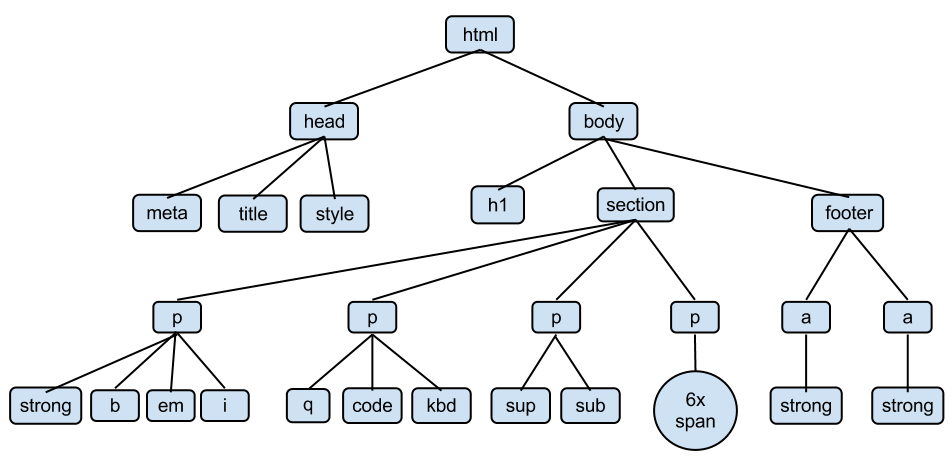

In [1]:
from IPython.display import Image
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')

When we scrape a webpage, we often only focus on the information that is relevant to us. For example, for this craigslit post, we want to know the price and the name of the product. Given its HTML structure, we can easily identify the important information. 

The steps to retrieve information are:

1. Open the HTML source page in the browser. 
2. Compare the source page with the actual web page to see how information are structured.
3. Use Beautifulsoup package to locate the elements that contain the information. 
4. Retrieve the information. 

[Introduction to BeautifulSoup]

### Example: Parse through an HTML page using Beautifulsoup

Let us first define a webpage and use beautifulSoup to pretify the page.

In [1]:
from bs4 import BeautifulSoup

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

# We can pretify the page using BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


First, we can get the basic structure of the page (i.e., **head**, **body**)

In [3]:
print(soup.head)

<head><title>The Dormouse's story</title></head>


In [2]:
print(soup.title)

<title>The Dormouse's story</title>


The most important function in BeautifulSoup is **find_all()**. This function will help you to find all tag elements with a certain tag and has a certain attribute.

For example, ```soup.find_all('a', {"class", "sister"})```, find all ```<a>``` tags that have class attribute equal to "sister." The function returns a list of tag elements and each element contains one tag. 

In [4]:
# Suppose that we want to parse and get the sister names
# Notice that we can get text 
for name in soup.find_all('a', {"class", "sister"}):
    print(name)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


For each beautifulSoup tag object such as ```<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>```, you can get its text using ```.text```, you can also use ```.get()``` function to get the attribute of the tag.

In [5]:
for name in soup.find_all('a', {"class", "sister"}):
    print(name.text)
    print(name.get('class'))

Elsie
['sister']
Lacie
['sister']
Tillie
['sister']


### Example Parse through an HTML page using Beautifulsoup

Let us then use BeautifulSoup to parse a real website from craigslist

In [21]:
import requests
from bs4 import BeautifulSoup

# read the macbook_pro html
with open("Data/macbook_pro.txt") as input_file:
    respData = input_file.read()

# # use beautifulsoup to locate all li elements with class = "result-row"
soup = BeautifulSoup(respData, "html.parser")
results = soup.find_all("li", {"class":"result-row"})

data = []
# traverse through all elements ang get price and name for each post
for element in results:
    try:
        name = element.find("a", {"class", "result-title hdrlnk"}).text
        row = [name]
        print(row)
        data.append(row)
    except Exception as e:
        print(str(e))
        continue

Error: cannot get for information
Error: cannot get for information
Error: cannot get for information
Error: cannot get for information
Error: cannot get for information
Error: cannot get for information
Error: cannot get for information
Error: cannot get for information
Error: cannot get for information


['$600',
 '$800',
 '$950',
 '$950',
 '$875',
 '$840',
 '$840',
 '$1250',
 '$1200',
 '$850',
 '$800',
 '$1199',
 '$545',
 '$675',
 '$1250',
 '$250',
 '$650',
 '$799',
 '$399',
 '$1000',
 '$900',
 '$475',
 '$20',
 '$400',
 '$30',
 '$450',
 '$225',
 '$1000',
 '$1000',
 '$50',
 '$675',
 '$1250',
 '$880',
 '$500',
 '$300',
 '$750',
 '$800',
 '$875',
 '$1300',
 '$350',
 '$45',
 '$125',
 '$950',
 '$950',
 '$20',
 '$650',
 '$650',
 '$549',
 '$360',
 '$650',
 '$800',
 '$600',
 '$500',
 '$20',
 '$500',
 '$725',
 '$850',
 '$280',
 '$749',
 '$100',
 '$600',
 '$800',
 '$900',
 '$550',
 '$1000',
 '$1000',
 '$400',
 '$400',
 '$1300',
 '$100',
 '$20',
 '$750',
 '$20',
 '$150',
 '$1',
 '$1000',
 '$779',
 '$900',
 '$175',
 '$400',
 '$30',
 '$300',
 '$149',
 '$70',
 '$999',
 '$500',
 '$200',
 '$900',
 '$1550',
 '$500',
 '$1150',
 '$900',
 '$1500',
 '$579',
 '$879',
 '$1050',
 '$1350',
 '$549',
 '$749',
 '$400',
 '$260',
 '$600',
 '$1399',
 '$1300',
 '$500',
 '$450',
 '$1200',
 '$325',
 '$850',
 '$425',
 

### Example 2.3.4 Save scraped information into a local file.

Last, we do not want to lose our valuable scraped information. Therefore, we would like to save them into a local file. Python offers many different ways to save data. The most convenient way is to store data into a list and save it into a csv or Excel file. The following example demonstrates it. 

In [23]:
# Give an example on save the data
import urllib
import csv
from bs4 import BeautifulSoup

# read the macbook_pro html
with open("Data/macbook_pro.txt") as input_file:
    respData = input_file.read()
    
# use beautifulsoup to locate all li elements with class = "result-row"
soup = BeautifulSoup(respData, "html.parser")
results = soup.find_all("li", class_="result-row")
data = []
# traverse through all elements ang get price and name for each post
for element in results:
    try:
        name = element.find("a", {"class", "result-title hdrlnk"}).text
        row = [name]
        data.append(row)
    except Exception as e:
        continue


# save the data to a local csv file.
myfile = open('Data/macbook_pro_craigslist.csv', 'w')
writer = csv.writer(myfile)
writer.writerows(data)
myfile.close()

In [26]:
%%bash

head ./Data/macbook_pro_craigslist.csv

Apple Macbook Pro 2012
"Macbook Pro 15 inch, Laptop Notebook Computer Apple (Intel Core i7)"
Apple Macbook Pro 15.4- inch (MD104LL/A)
Macbook Pro Notebook 15 inch -2012 model- Core i7 Quad Core w/ 8GB RAM
"Macbook Pro 15"" Inch / Loaded and Upgraded / 16GB RAM"
Macbook Pro Notebook 13 inch * Core i5 * 16GB RAM
"MacBook Pro / 13"" inch / Aluminum / UPgraded"
MACBOOK PRO 15 inch
MACBOOK Pro 15 INCH CORE 2 DUO
Apple MacBook Pro / Customized / Intel Core i5 + 16GB RAM
